In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/Othercomputers/My Laptop'

/content/drive/Othercomputers/My Laptop


In [3]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [4]:
# Constant for image processing
IMAGES_SIZE = 224
BATCH_SIZE = 64

In [5]:
# Load datasets from directories
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Othercomputers/My Laptop/NewDataset2/train',
    shuffle=True,
    image_size=(IMAGES_SIZE, IMAGES_SIZE),
    batch_size=BATCH_SIZE
)


Found 16504 files belonging to 15 classes.


In [6]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Othercomputers/My Laptop/NewDataset2/test',
    shuffle=False,  # No need to shuffle the test set
    image_size=(IMAGES_SIZE, IMAGES_SIZE),
    batch_size=BATCH_SIZE
)

Found 2064 files belonging to 15 classes.


In [7]:
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Othercomputers/My Laptop/NewDataset2/validation',
    shuffle=False,  # No need to shuffle the validation set
    image_size=(IMAGES_SIZE, IMAGES_SIZE),
    batch_size=BATCH_SIZE
)

Found 2070 files belonging to 15 classes.


In [11]:
# Display class names in the dataset
class_names = train_dataset.class_names

# Print class names with their index
for index, class_name in enumerate(class_names):
    print(f'Class index {index}: {class_name}')


Class index 0: Pepper Bell Bacterial Spot
Class index 1: Pepper Bell Healthy
Class index 2: Potato Early Blight
Class index 3: Potato Healthy
Class index 4: Potato Late Blight
Class index 5: Tomato Bacterial Spot
Class index 6: Tomato Early Blight
Class index 7: Tomato Healthy
Class index 8: Tomato Late Blight
Class index 9: Tomato Leaf Mold
Class index 10: Tomato Mosaic Virus
Class index 11: Tomato Septoria Leaf Spot
Class index 12: Tomato Spider Mites Two Spotted Spider Mite
Class index 13: Tomato Target Spot
Class index 14: Tomato Yellow Leaf Curl Virus


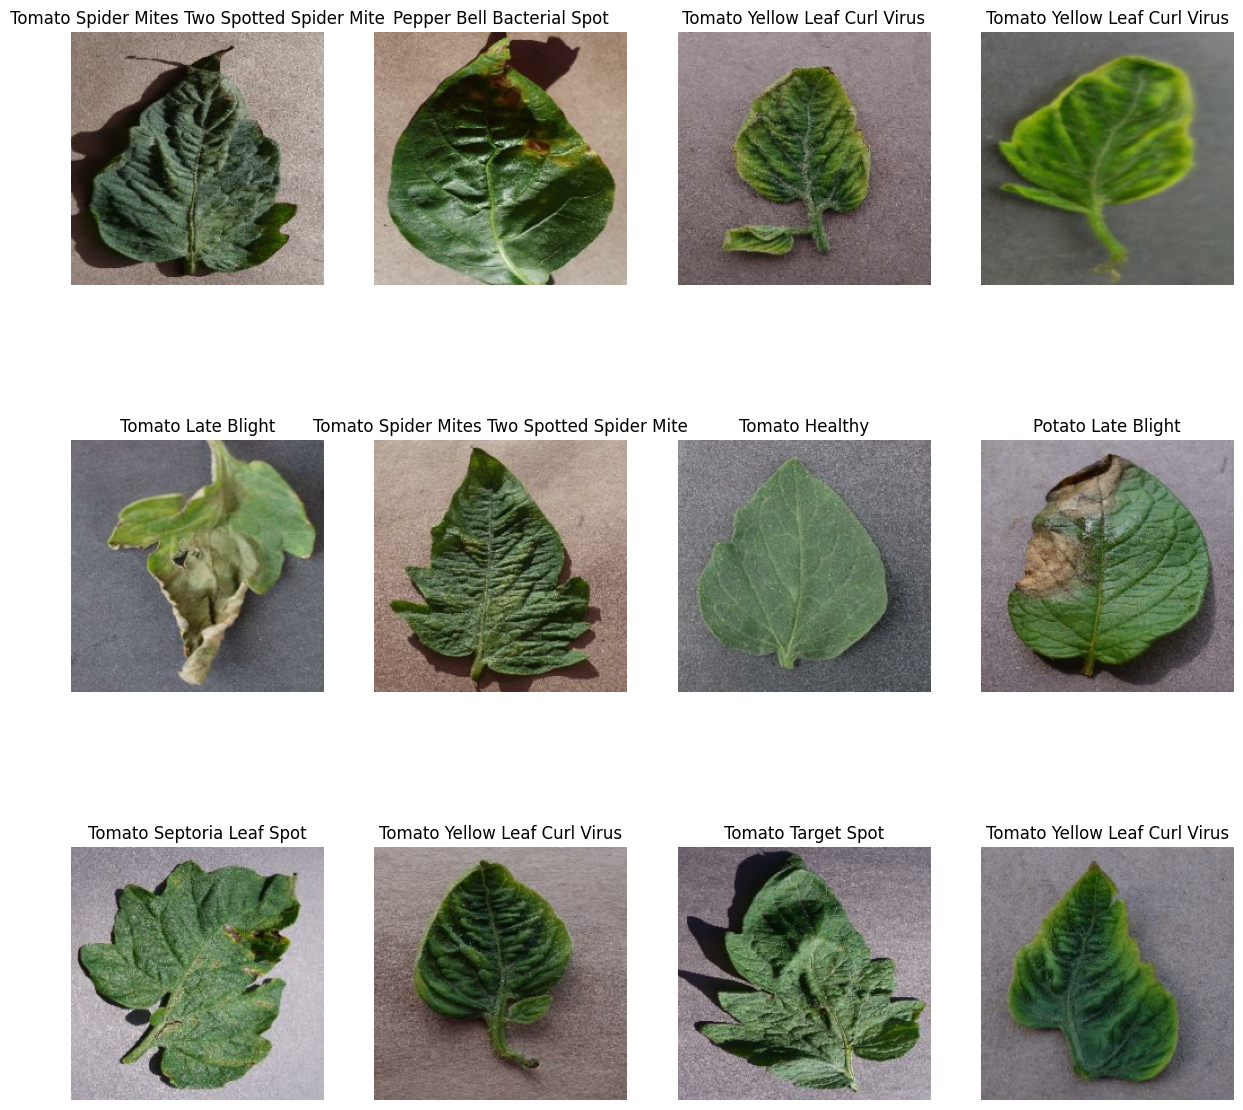

In [ ]:
# Display images from the dataset
plt.figure(figsize=(15, 15))
for image_batch, label_batch in train_dataset.take(2):
    for i in range(12):
      ax = plt.subplot(3, 4, i + 1)
      plt.imshow(image_batch[i].numpy().astype('uint8'))
      plt.title(class_names[label_batch[i]])
      plt.axis('off')

In [8]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGES_SIZE, IMAGES_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input

input_shape = (IMAGES_SIZE, IMAGES_SIZE, 3)
num_classes = len(class_names)
# Load ResNet50 pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the ResNet50 base
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # num_classes is the number of output classes
])

94765736/94765736 [==============================] - 4s 0us/step


In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                3855      
                                                                 
Total params: 24116111 (92.00 MB)
Trainable params: 528399 (2.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

In [14]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [15]:
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.96
)

In [16]:
# Create an optimizer with the scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [17]:
# Define a learning rate schedule callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: learning_rate(epoch))

In [18]:
EPOCHS = 40
history = model.fit(
    train_dataset,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = valid_dataset,
    callbacks = [lr_schedule]
)

Epoch 1/40
258/258 [==============================] - 1422s 5s/step - loss: 1.4027 - accuracy: 0.5773 - val_loss: 0.6093 - val_accuracy: 0.8464 - lr: 1.0000e-04
Epoch 2/40
258/258 [==============================] - 56s 216ms/step - loss: 0.6459 - accuracy: 0.7990 - val_loss: 0.4032 - val_accuracy: 0.8981 - lr: 9.9996e-05
Epoch 3/40
258/258 [==============================] - 55s 210ms/step - loss: 0.4773 - accuracy: 0.8503 - val_loss: 0.3230 - val_accuracy: 0.9135 - lr: 9.9992e-05
Epoch 4/40
258/258 [==============================] - 55s 210ms/step - loss: 0.3895 - accuracy: 0.8759 - val_loss: 0.2715 - val_accuracy: 0.9237 - lr: 9.9988e-05
Epoch 5/40
258/258 [==============================] - 55s 211ms/step - loss: 0.3278 - accuracy: 0.8992 - val_loss: 0.2444 - val_accuracy: 0.9309 - lr: 9.9984e-05
Epoch 6/40
258/258 [==============================] - 55s 210ms/step - loss: 0.2871 - accuracy: 0.9141 - val_loss: 0.2191 - val_accuracy: 0.9338 - lr: 9.9980e-05
Epoch 7/40
258/258 [=========

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy}')

33/33 [==============================] - 162s 5s/step - loss: 0.0765 - accuracy: 0.9729
Test Accuracy: 0.9728682041168213


In [20]:
# Calculate additional metrics
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

33/33 [==============================] - 7s 182ms/step


In [21]:
# Calculate accuracy rate
accuracy_rate = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy Rate: {accuracy_rate}')

Accuracy Rate: 0.9728682170542635


In [22]:
# Calculate error rate
error_rate = 1 - accuracy_rate
print(f'Error Rate: {error_rate}')

Error Rate: 0.027131782945736482


In [23]:
# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print(f'Recall: {recall}')

Recall: 0.9728682170542635


In [24]:
from sklearn.metrics import f1_score

f1 = f1_score(true_labels, predicted_labels, average = 'weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.9729623195844798


In [25]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print(f'Precision: {precision}')

Precision: 0.9732762731919539


In [26]:
# Display confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[100   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  99   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  15   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  98   0   1   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0 212   0   0   0   0   0   0   0   0   1]
 [  0   0   2   0   1   0  91   0   3   0   0   1   1   1   0]
 [  0   0   0   0   0   0   0 156   0   0   0   0   0   3   0]
 [  0   0   0   0   1   0   3   0 184   1   0   1   0   0   1]
 [  0   0   0   0   0   1   2   0   0  89   1   1   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0  36   1   0   0   0]
 [  0   0   1   0   0   1   4   0   0   1   1 167   2   0   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0 164   2   0]
 [  0   0   0   0   0   0   3   2   1   0   0   0   3 131   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   1 318]]


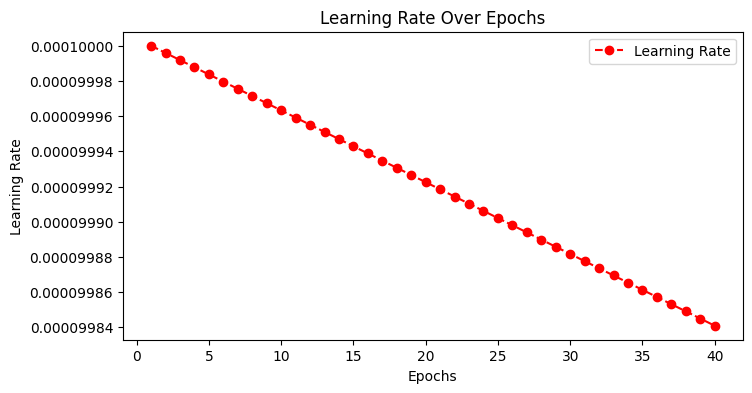

In [27]:
# Access the learning rate during training
learning_rates = history.history['lr']
epochs_range = range(1, EPOCHS + 1)
# Plot learning rates
plt.figure(figsize=(8, 4))
plt.plot(epochs_range, learning_rates, label='Learning Rate', marker='o', linestyle='--', color='r')
plt.title('Learning Rate Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()


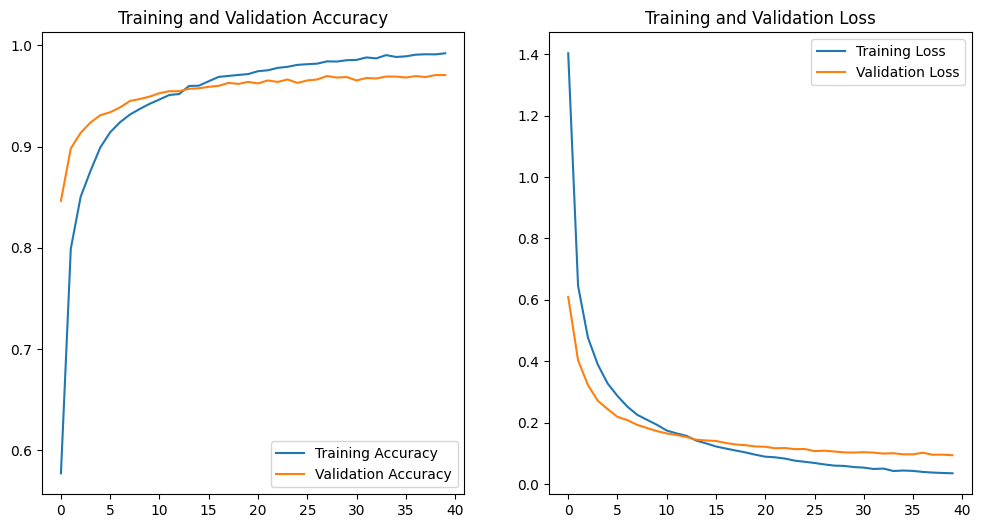

In [28]:
# Plot training and validation curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [29]:
model.save("/content/drive/Othercomputers/My Laptop/NewDataset2/CNN(Model2_RESNET50)2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


first image prediction
actual label: Pepper Bell Bacterial Spot
2/2 [==============================] - 3s 17ms/step
predicted label: Pepper Bell Bacterial Spot


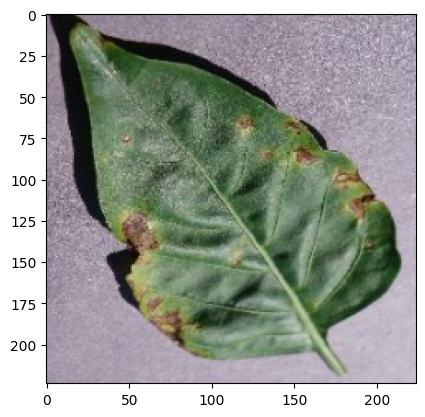

In [ ]:
for images_batch, labels_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image prediction")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(15):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Predicted Class: {predicted_class},\n Actual Class: {actual_class},\n Confidence: {confidence}")
        plt.axis("off")

plt.show()

Output hidden; open in https://colab.research.google.com to view.